In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report, silhouette_score, silhouette_samples

In [2]:
import kagglehub
import pandas as pd
import os

# Download latest version
dataset_dir = kagglehub.dataset_download("devarajv88/walmart-sales-dataset")

# Find the CSV file within the downloaded directory
for filename in os.listdir(dataset_dir):
    if filename.endswith(".csv"):
        csv_file_path = os.path.join(dataset_dir, filename)
        break  # Stop after finding the first CSV file

# Read the CSV file using pandas
walmart = pd.read_csv(csv_file_path)
walmart.head()

100%|██████████| 4.80M/4.80M [00:00<00:00, 56.1MB/s]

Extracting files...


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


Dataset Description:

1. User_ID                : Unique identifier for each user.
2. Product_ID             : Unique identifier for each product.
3. Gender                 : Gender of the user (e.g., Male, Female).
4. Age                    : Age of the user in predefined bins (e.g., 18-25).
5. Occupation             : Occupation of the user (masked for anonymity).
6. City_Category          : Category of the city where the user resides (A, B, C).
7. StayInCurrentCityYears : Number of years the user has stayed in the current city.
8. Marital_Status         : Marital status of the user (e.g., 0 = Single, 1 = Married).
9. ProductCategory        : Category of the product purchased (masked).
10. Purchase              : Purchase amount spent by the user (numerical value).

In [ ]:
walmart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [ ]:
walmart.duplicated().sum()

0

In [ ]:
walmart['User_ID'] = walmart['User_ID'].astype("object")
walmart['Occupation'] = walmart['Occupation'].astype("object")
walmart['Marital_Status'] = walmart['Marital_Status'].astype("object")
walmart['Product_Category'] = walmart['Product_Category'].astype("object")

In [ ]:
walmart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [ ]:
walmart.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


# Exploratory Data Analysis

# Gender

<ipython-input-12-e68399aaae22>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=gender_total_purchase, x='Gender', y='Purchase', palette='Blues_d')


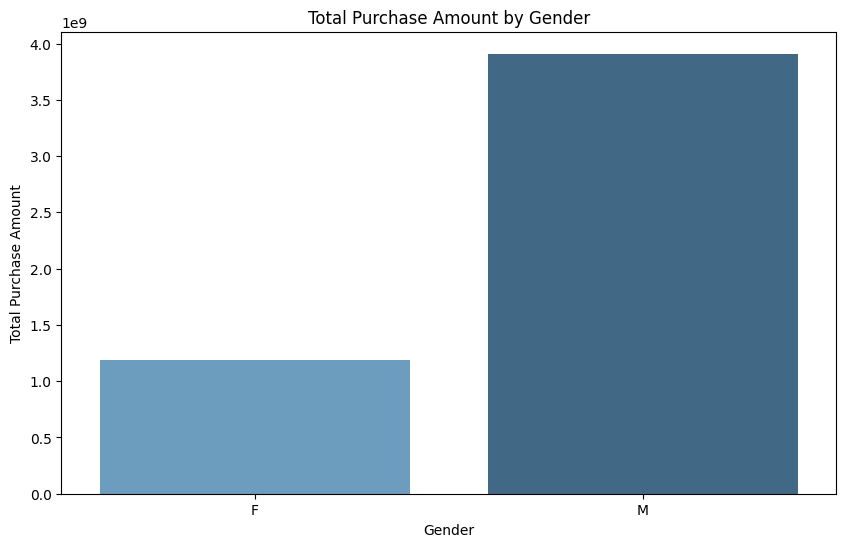

In [ ]:
# 1. Total Purchase Amount by Gender
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

gender_total_purchase = walmart.groupby('Gender')['Purchase'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(data=gender_total_purchase, x='Gender', y='Purchase', palette='Blues_d')
plt.title('Total Purchase Amount by Gender')
plt.xlabel('Gender')
plt.ylabel('Total Purchase Amount')
plt.show()

<ipython-input-14-41ae7c04ff2a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=gender_avg_purchase, x='Gender', y='Purchase', palette='Blues_d')


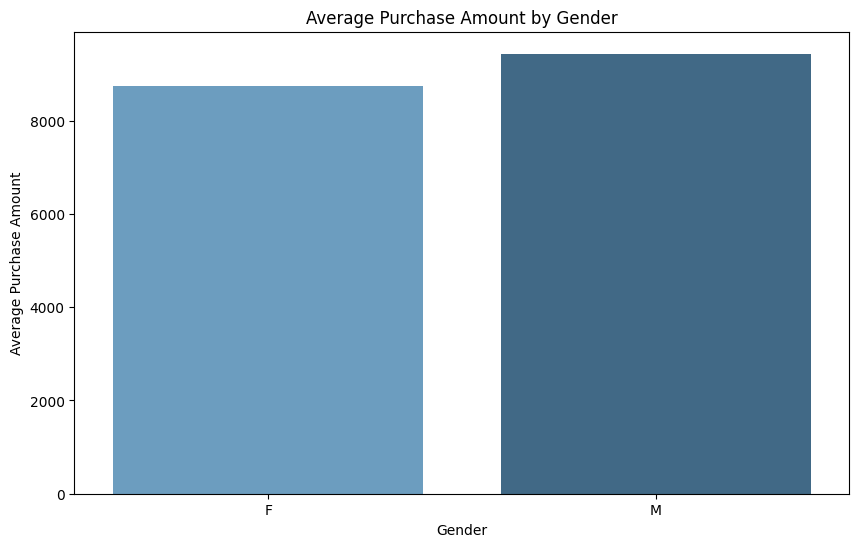

In [ ]:
# Average Purchase Amount by Gender
plt.figure(figsize=(10, 6))
sns.barplot(data=gender_avg_purchase, x='Gender', y='Purchase', palette='Blues_d')
plt.title('Average Purchase Amount by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Purchase Amount')
plt.show()

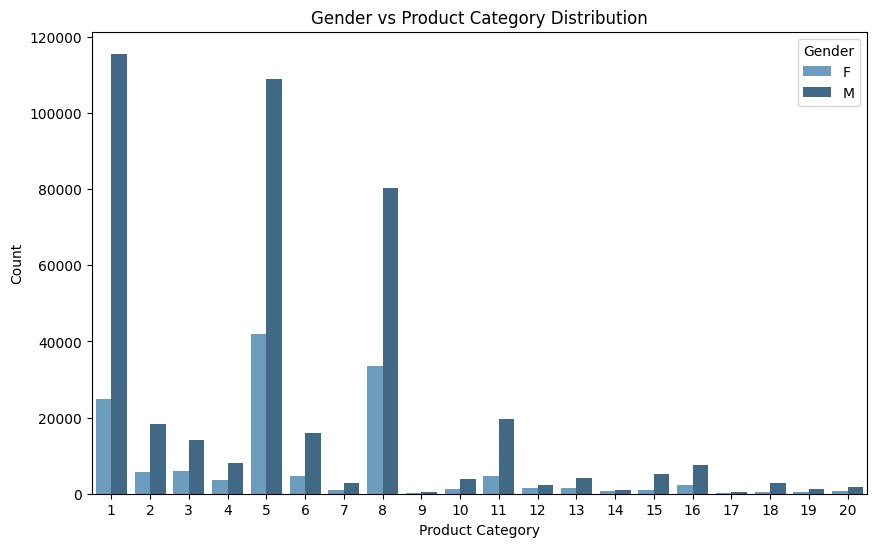

In [ ]:
# Gender vs Product Category Distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=walmart, x='Product_Category', hue='Gender', palette='Blues_d', order=sorted(walmart['Product_Category'].unique()))
plt.title('Gender vs Product Category Distribution')
plt.xlabel('Product Category')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.show()

<ipython-input-17-60ca7b6f536e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=walmart, x='Gender', y='Purchase', palette='Blues_d')


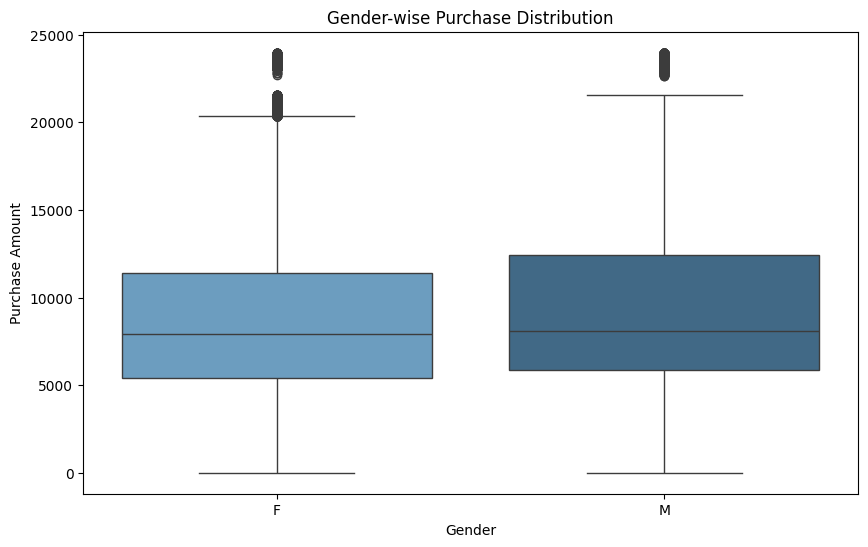

In [ ]:
# Gender-wise Purchase Distribution
plt.figure(figsize=(10, 6))
sns.boxplot(data=walmart, x='Gender', y='Purchase', palette='Blues_d')
plt.title('Gender-wise Purchase Distribution')
plt.xlabel('Gender')
plt.ylabel('Purchase Amount')
plt.show()

# Stay_In_Current_City_Years

In [ ]:
walmart['Stay_In_Current_City_Years'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 550068 entries, 0 to 550067
Series name: Stay_In_Current_City_Years
Non-Null Count   Dtype 
--------------   ----- 
550068 non-null  object
dtypes: object(1)
memory usage: 4.2+ MB


<ipython-input-63-0ee1fb2ab386>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Stay_In_Current_City_Years', y='sum', data=purchase_by_city_years, palette="Blues_d")
<ipython-input-63-0ee1fb2ab386>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Stay_In_Current_City_Years', y='mean', data=purchase_by_city_years, palette="Blues_d")


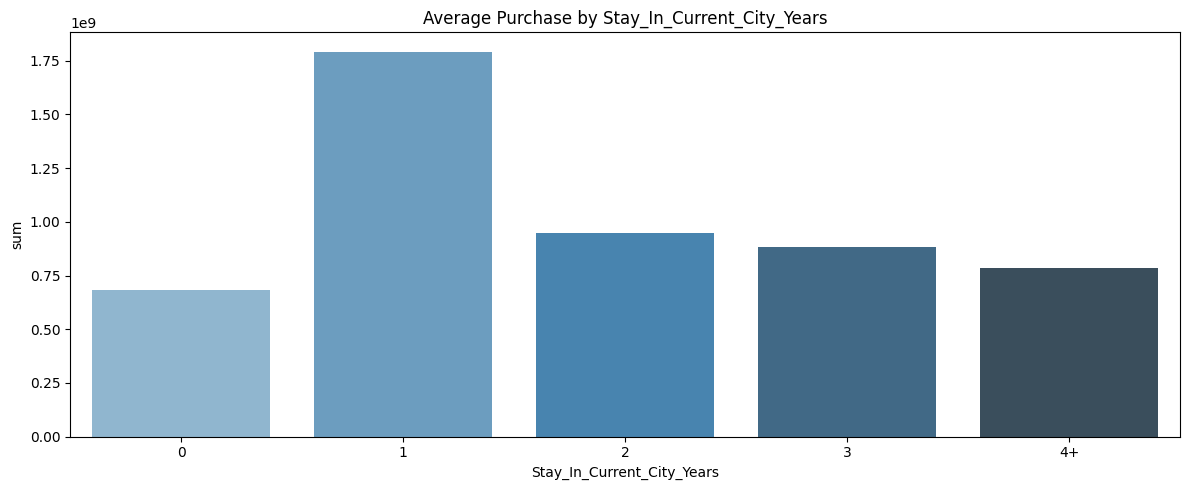

<ipython-input-63-0ee1fb2ab386>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Stay_In_Current_City_Years', y='Purchase', data=walmart, order=sorted(walmart['Stay_In_Current_City_Years'].unique()), palette="Blues_d")


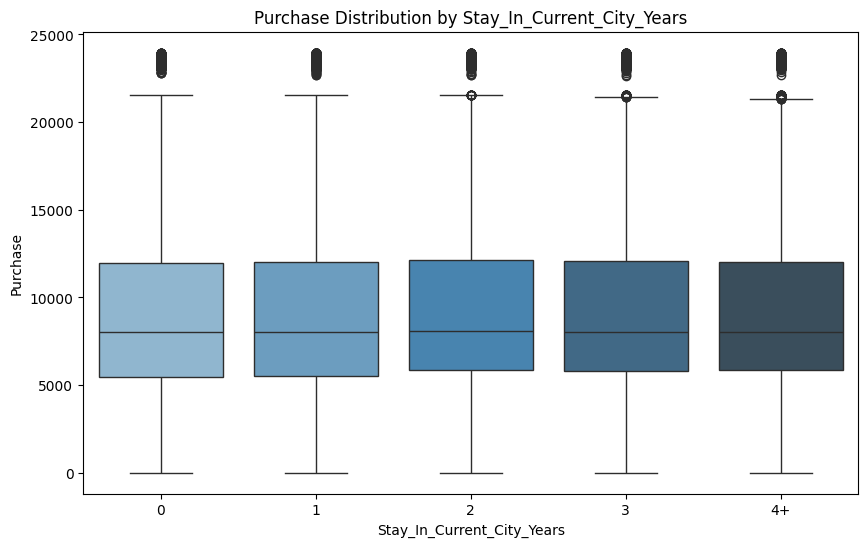

<ipython-input-63-0ee1fb2ab386>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Stay_In_Current_City_Years', y='Purchase', data=purchase_frequency, palette="Blues_d")


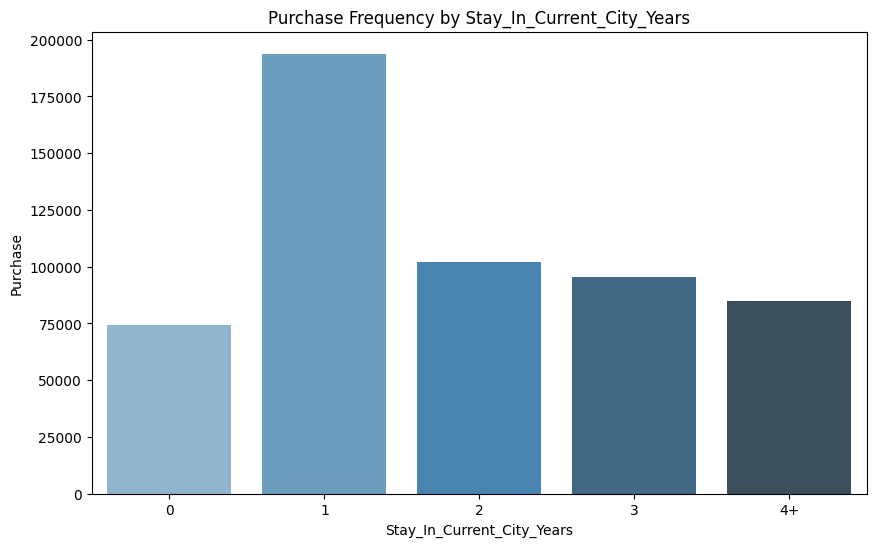

In [ ]:
# prompt: generate bar charts to present the total purchase and average purchase by  Stay_In_Current_City_Years, plot another box plot to show distribution and order by Stay_In_Current_City_Years, plot barchart to show the purchase frequency by Stay_In_Current_City_Years, using the same color to differentiate different  Stay_In_Current_City_Years in four graphs

import matplotlib.pyplot as plt
import seaborn as sns

# Total and Average Purchase by Stay_In_Current_City_Years
purchase_by_city_years = walmart.groupby('Stay_In_Current_City_Years')['Purchase'].agg(['sum', 'mean']).reset_index()

plt.figure(figsize=(12, 5))
sns.barplot(x='Stay_In_Current_City_Years', y='sum', data=purchase_by_city_years, palette="Blues_d")
plt.title('Total Purchase by Stay_In_Current_City_Years')

sns.barplot(x='Stay_In_Current_City_Years', y='mean', data=purchase_by_city_years, palette="Blues_d")
plt.title('Average Purchase by Stay_In_Current_City_Years')
plt.tight_layout()
plt.show()

# Box Plot of Purchase Distribution by Stay_In_Current_City_Years
plt.figure(figsize=(10, 6))
sns.boxplot(x='Stay_In_Current_City_Years', y='Purchase', data=walmart, order=sorted(walmart['Stay_In_Current_City_Years'].unique()), palette="Blues_d")
plt.title('Purchase Distribution by Stay_In_Current_City_Years')
plt.show()

# Purchase Frequency by Stay_In_Current_City_Years
purchase_frequency = walmart.groupby('Stay_In_Current_City_Years')['Purchase'].count().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='Stay_In_Current_City_Years', y='Purchase', data=purchase_frequency, palette="Blues_d")
plt.title('Purchase Frequency by Stay_In_Current_City_Years')
plt.show()

1. Total Purchase by Stay_In_Current_City_Years (Bar Plot - Left)


	•	The total purchase is highest for customers who have stayed in the city for 1 year, while customers in other categories (2, 3, 4+, 0 years) contribute significantly less to the total purchase.

	•	Insight: Newer residents (1 year of stay) may be more active shoppers or make higher total purchases compared to other groups?

2. Average Purchase by Stay_In_Current_City_Years (Bar Plot - Center)


	•	The average purchase amounts are nearly identical across all categories, hovering around the same level (close to 8,000).

	•	Insight: While the total purchases differ, the average spending per transaction is consistent, regardless of how long customers have stayed in the city.

	•	Insight: This indicates that the differences in total purchases are driven by the number of transactions (frequency) rather than the spending per transaction.

3. Purchase Distribution by Stay_In_Current_City_Years (Box Plot - Right)


	•	The median purchase amount is also similar across all categories.
	•	The spread (interquartile range) of purchases is consistent across all categories of Stay_In_Current_City_Years.
	•	Insight: There is no noticeable difference in the distribution of purchases between categories, further supporting the idea that the variability in total purchases arises from transaction frequency rather than transaction size.

4. Purchase Frequency by Stay_In_Current_City_Years (Bottom Right Chart)


	•	Customers in the 1 year category have the highest frequency of purchases, while with 4+ years having the lowest frequency.


Overall Interpretation

	•	Customers who stayed for 1 year contribute the most to total purchases (as seen in the bar chart).

	•	However, the individual spending behavior (as shown in the boxplot) is fairly consistent across all groups, suggesting that their individual spending behaviors are similar per transaction.

	•	As shown in the bar chart for purchase frequency, the higher total purchases in the 1 year group is likely to be attributed to their greater purchase frequency rather than higher individual spending.

	•	This suggests that newer residents are more actively shopping at Walmart, possibly due to their need to set up homes or familiarize themselves with the store.

# marital status

<ipython-input-64-724de3fd0548>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Marital_Status', y='Purchase', data=purchase_frequency, palette='Blues_d')


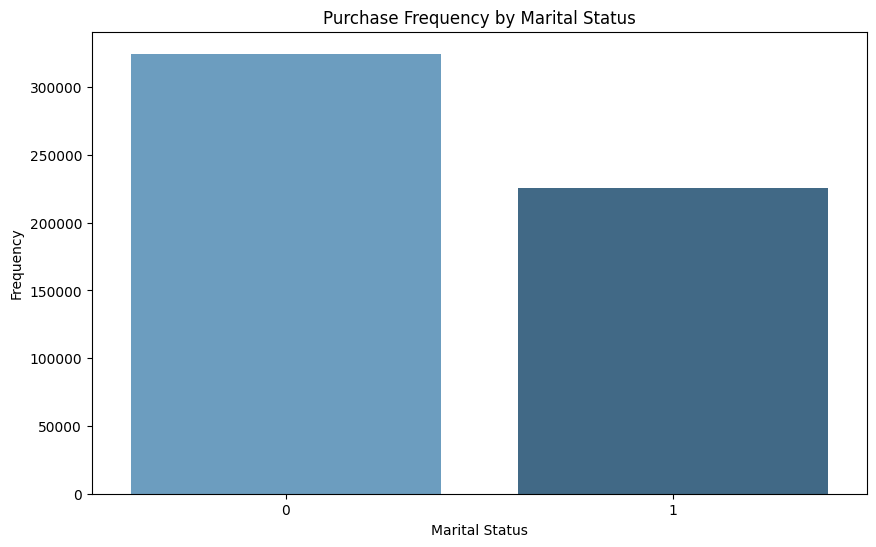

In [ ]:
# Calculate frequency of purchases by marital status
purchase_frequency = walmart.groupby('Marital_Status')['Purchase'].count().reset_index()

# Bar Plot for Purchase Frequency
plt.figure(figsize=(10, 6))
sns.barplot(x='Marital_Status', y='Purchase', data=purchase_frequency, palette='Blues_d')
plt.title('Purchase Frequency by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Frequency')
plt.show()


<ipython-input-65-a3043b453061>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Marital_Status', y='sum', data=purchase_by_marital_status, palette='Blues_d')


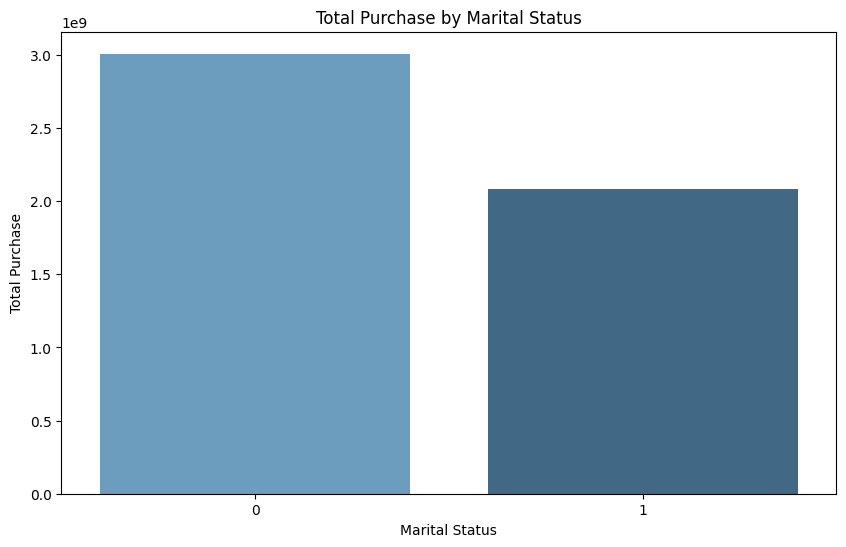

<ipython-input-65-a3043b453061>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Marital_Status', y='mean', data=purchase_by_marital_status, palette='Blues_d')


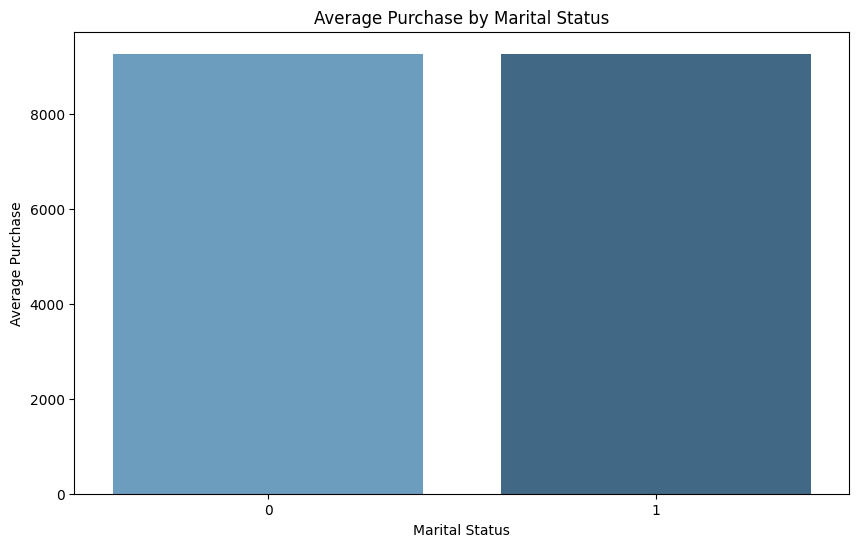

In [ ]:
import kagglehub
import pandas as pd
import os

# Download latest version
dataset_dir = kagglehub.dataset_download("devarajv88/walmart-sales-dataset")

# Find the CSV file within the downloaded directory
for filename in os.listdir(dataset_dir):
    if filename.endswith(".csv"):
        csv_file_path = os.path.join(dataset_dir, filename)
        break  # Stop after finding the first CSV file

# Read the CSV file using pandas
walmart = pd.read_csv(csv_file_path)
walmart.head()

# Group by Marital Status and calculate total and average purchase
purchase_by_marital_status = walmart.groupby('Marital_Status')['Purchase'].agg(['sum', 'mean']).reset_index()

# Total Purchase by Marital Status
plt.figure(figsize=(10, 6))
sns.barplot(x='Marital_Status', y='sum', data=purchase_by_marital_status, palette='Blues_d')
plt.title('Total Purchase by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Total Purchase')
plt.show()

# Average Purchase by Marital Status
plt.figure(figsize=(10, 6))
sns.barplot(x='Marital_Status', y='mean', data=purchase_by_marital_status, palette='Blues_d')
plt.title('Average Purchase by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Average Purchase')
plt.show()

<ipython-input-66-95a02f557185>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Marital_Status', y='Purchase', data=walmart, palette='Blues_d')


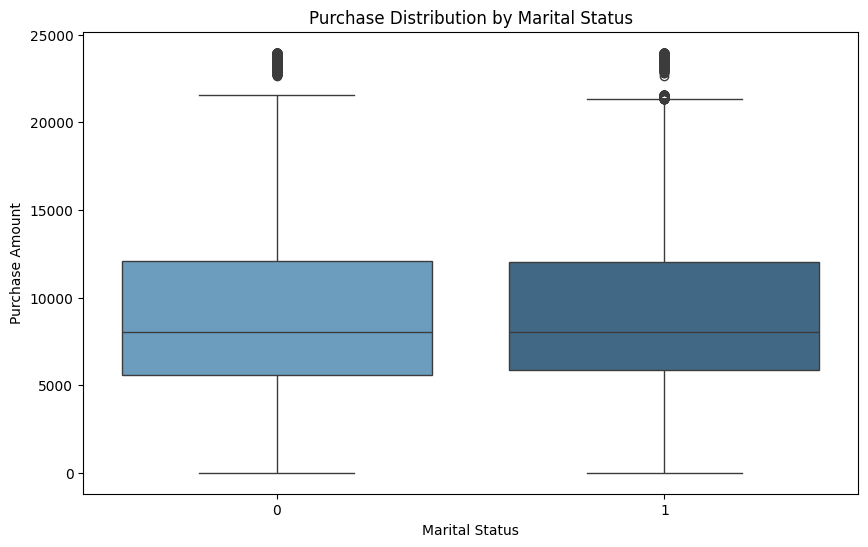

In [ ]:
# Box Plot for Purchase Distribution by Marital Status
plt.figure(figsize=(10, 6))
sns.boxplot(x='Marital_Status', y='Purchase', data=walmart, palette='Blues_d')
plt.title('Purchase Distribution by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Purchase Amount')
plt.show()


<ipython-input-67-8efd8f4b94d2>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Age', y='Purchase', data=total_purchase_age, palette="Blues_d")


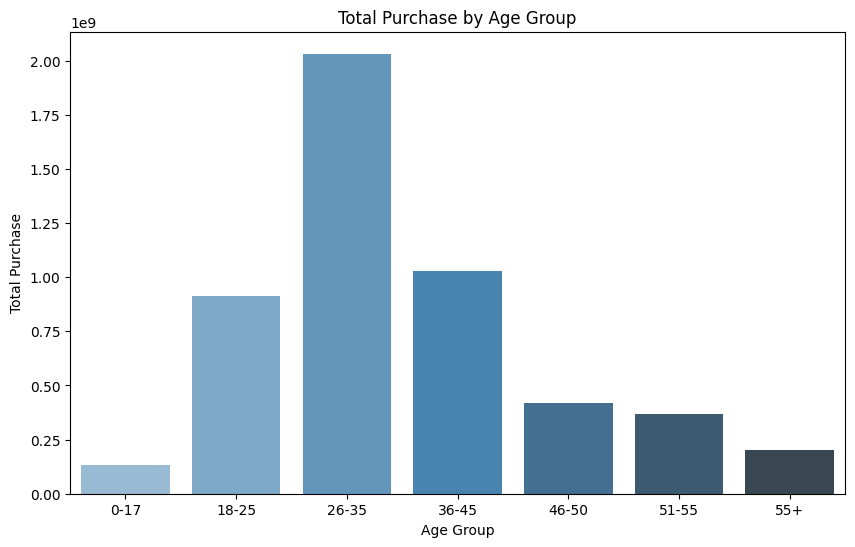

In [ ]:
# Group by 'Age' and calculate total purchase
total_purchase_age = walmart.groupby('Age')['Purchase'].sum().reset_index()

# Plot Total Purchase by Age
plt.figure(figsize=(10, 6))
sns.barplot(x='Age', y='Purchase', data=total_purchase_age, palette="Blues_d")
plt.title('Total Purchase by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Total Purchase')
plt.show()


<ipython-input-68-f5ac1a4affb2>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Age', y='Purchase', data=average_purchase_age, palette="Blues_d")


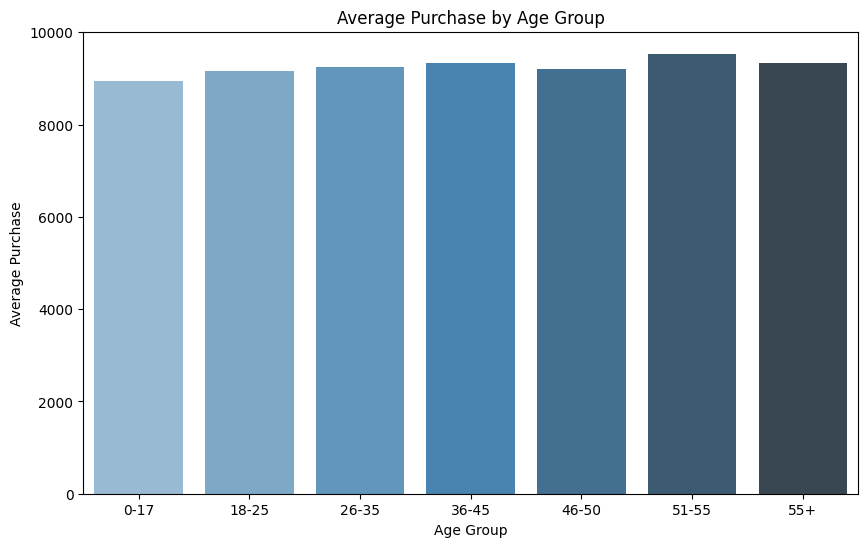

In [ ]:
# Group by 'Age' and calculate average purchase
average_purchase_age = walmart.groupby('Age')['Purchase'].mean().reset_index()

# Plot Average Purchase by Age
plt.figure(figsize=(10, 6))
sns.barplot(x='Age', y='Purchase', data=average_purchase_age, palette="Blues_d")
plt.title('Average Purchase by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Purchase')
plt.show()


<ipython-input-69-097ac40c6dcf>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Age', y='Purchase', data=walmart, palette="Blues_d")


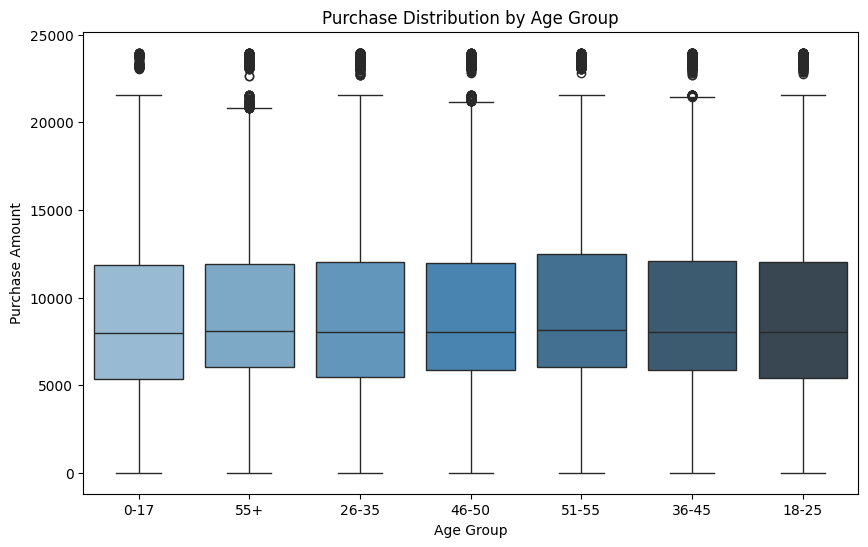

In [ ]:
# Box plot for purchase distribution by age group
plt.figure(figsize=(10, 6))
sns.boxplot(x='Age', y='Purchase', data=walmart, palette="Blues_d")
plt.title('Purchase Distribution by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Purchase Amount')
plt.show()


<ipython-input-70-dd5909409c99>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Age', y='Purchase', data=purchase_frequency_age, palette="Blues_d")


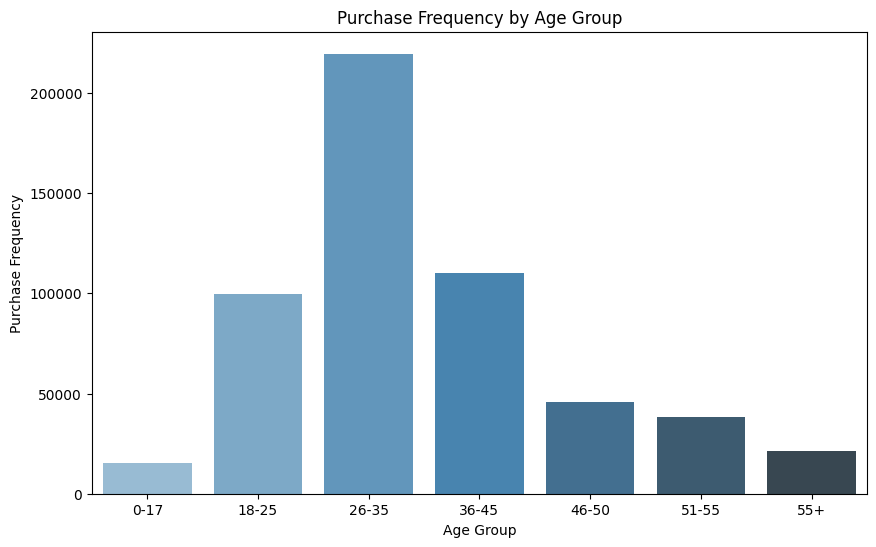

In [ ]:
# Calculate purchase frequency by age group
purchase_frequency_age = walmart.groupby('Age')['Purchase'].count().reset_index()

# Plot Purchase Frequency by Age
plt.figure(figsize=(10, 6))
sns.barplot(x='Age', y='Purchase', data=purchase_frequency_age, palette="Blues_d")
plt.title('Purchase Frequency by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Purchase Frequency')
plt.show()


# City

In [ ]:
# Average Purchase Amount by City
avg_purchase_by_city = walmart.groupby("City_Category")["Purchase"].mean()
print(avg_purchase_by_city)

# Count and proportion of purchases by city
purchase_count_by_city = walmart["City_Category"].value_counts(normalize=True) * 100
print(purchase_count_by_city)

City_Category
A    8911.939216
B    9151.300563
C    9719.920993
Name: Purchase, dtype: float64
City_Category
B    42.026259
C    31.118880
A    26.854862
Name: proportion, dtype: float64


<ipython-input-72-a22a916a66e3>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = walmart, x = "City_Category",palette="Blues_d", order = sorted(walmart['City_Category'].unique()))


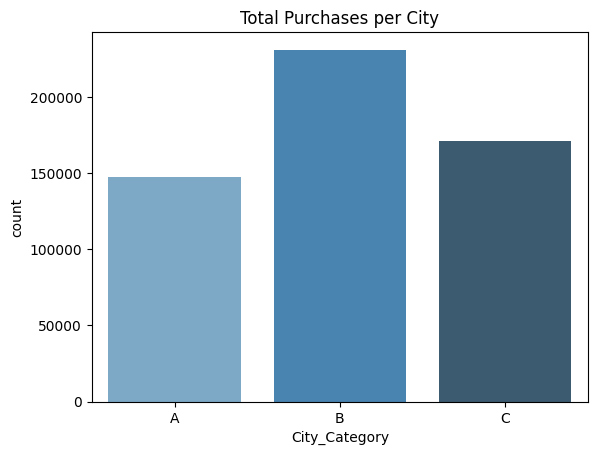

<ipython-input-72-a22a916a66e3>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="City_Category", y="Purchase", data=walmart, palette="Blues_d")


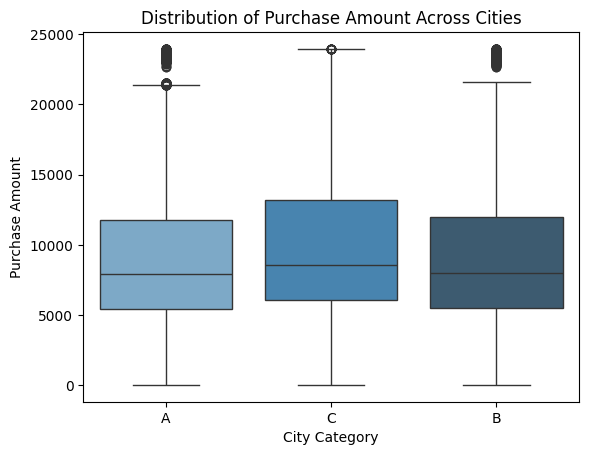

<ipython-input-72-a22a916a66e3>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='City_Category', y='Purchase', data=purchase_frequency, palette="Blues_d")


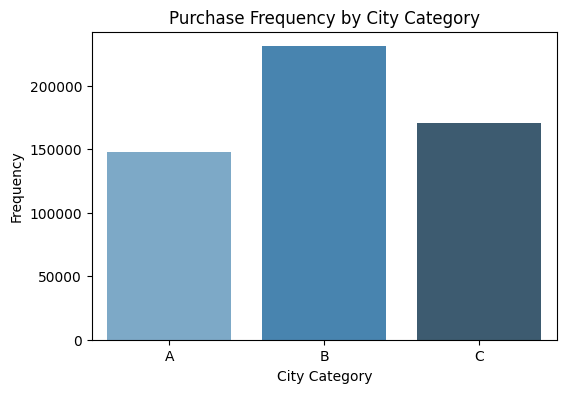

<ipython-input-72-a22a916a66e3>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


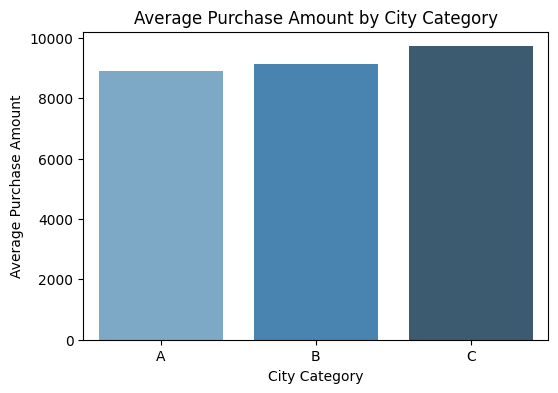

<ipython-input-72-a22a916a66e3>:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(data=highest_avg_purchase, x='City_Category', y='average_purchase',palette="Blues_d", dodge=False,)


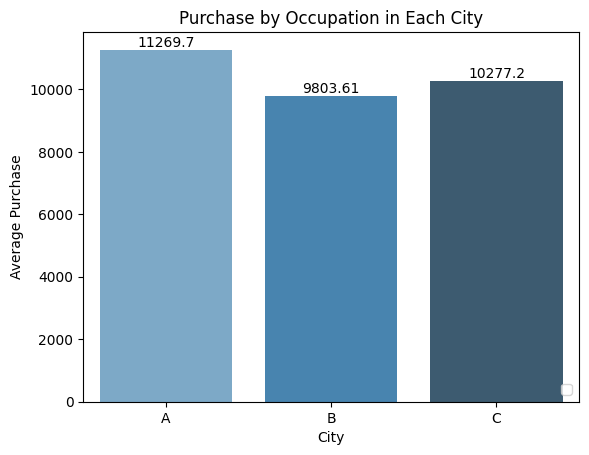

In [ ]:
# Bar chart of purchases per city category
sns.countplot(data = walmart, x = "City_Category",palette="Blues_d", order = sorted(walmart['City_Category'].unique()))
plt.title("Total Purchases per City")

plt.show()

#Distribution of purchase for each city
sns.boxplot(x="City_Category", y="Purchase", data=walmart, palette="Blues_d")
plt.title("Distribution of Purchase Amount Across Cities")
plt.xlabel("City Category")
plt.ylabel("Purchase Amount")
plt.show()

# Bar Plot for Purchase Frequency

purchase_frequency = walmart.groupby('City_Category')['Purchase'].count().reset_index()
plt.figure(figsize=(6, 4))
sns.barplot(x='City_Category', y='Purchase', data=purchase_frequency, palette="Blues_d")
plt.title('Purchase Frequency by City Category')
plt.xlabel('City Category')
plt.ylabel('Frequency')
plt.show()


# Average purchase in each city

average_purchase_per_city = walmart.groupby("City_Category")["Purchase"].agg(['sum', 'mean']).reset_index()
plt.figure(figsize=(6, 4))
sns.barplot(
    data=average_purchase_per_city,
    x="City_Category",
    y="mean",
    palette="Blues_d"
)

plt.title("Average Purchase Amount by City Category")
plt.xlabel("City Category")
plt.ylabel("Average Purchase Amount")
plt.xticks(rotation=0)
plt.show()

#Average purchase in each city category by occupation
purchase_city = walmart.groupby(["City_Category", "Occupation"])["Purchase"].mean().to_frame("average_purchase").reset_index()

#Step 2. Find the highest in each category
max_indices = purchase_city.groupby("City_Category")["average_purchase"].idxmax()
highest_avg_purchase = purchase_city.loc[max_indices]

#Step 3. Show result
bar_plot = sns.barplot(data=highest_avg_purchase, x='City_Category', y='average_purchase',palette="Blues_d", dodge=False,)
for container in bar_plot.containers:
    bar_plot.bar_label(container)
plt.title("Purchase by Occupation in Each City")
plt.xlabel("City")
plt.ylabel("Average Purchase")
plt.legend(loc='lower right')
plt.show()


# Product category preferences by city

# product_city = walmart.groupby("City_Category")["Product_Category"].value_counts(normalize=True).unstack().T
# product_city.plot(kind="bar", stacked=True, figsize=(10, 6))
# plt.title("Product Category Preferences by City")
# plt.ylabel("Proportion")
# plt.show()



Occupation


<ipython-input-73-dc6cba5e9407>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_pur_by_occ['Occupation'], y=avg_pur_by_occ['Purchase'], palette='Blues_d')


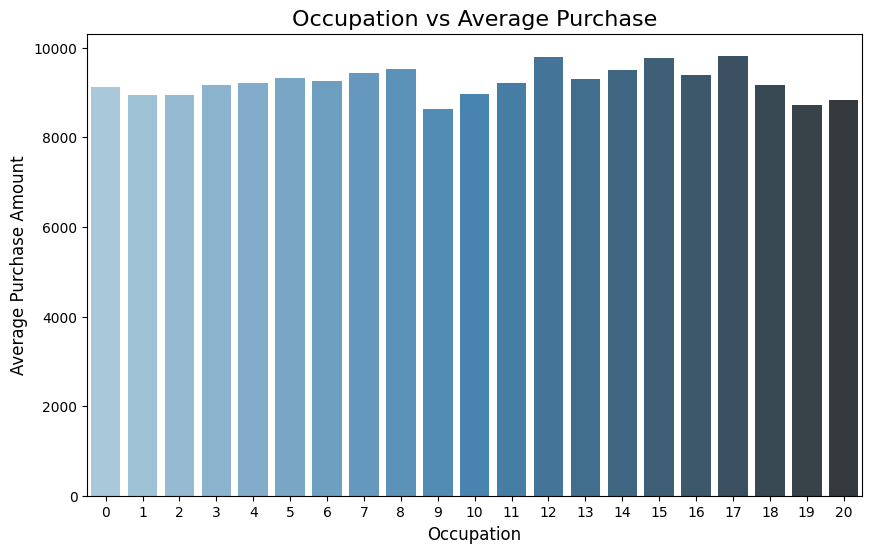

<ipython-input-73-dc6cba5e9407>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=walmart['Occupation'], y=walmart['Purchase'], palette='Blues_d')


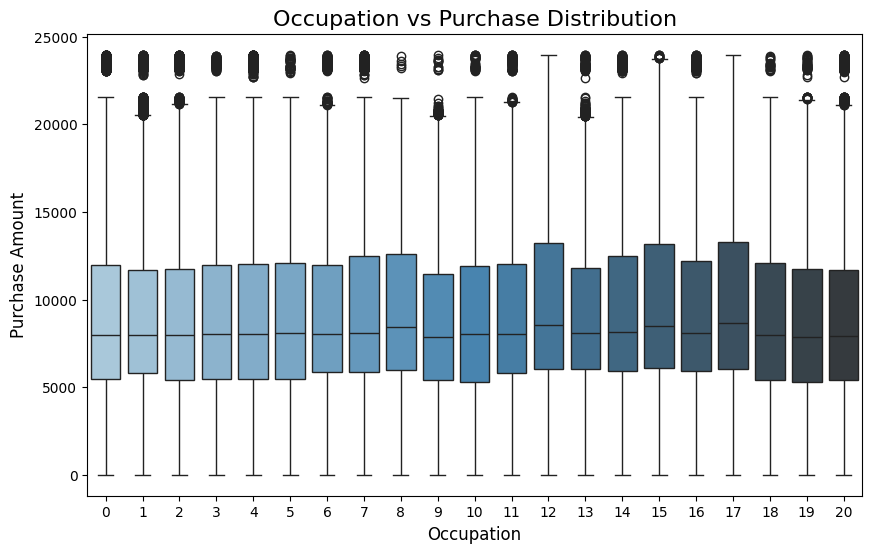

<ipython-input-73-dc6cba5e9407>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=freq_pur_by_occ['Occupation'], y=freq_pur_by_occ['Frequency'], palette='Blues_d')


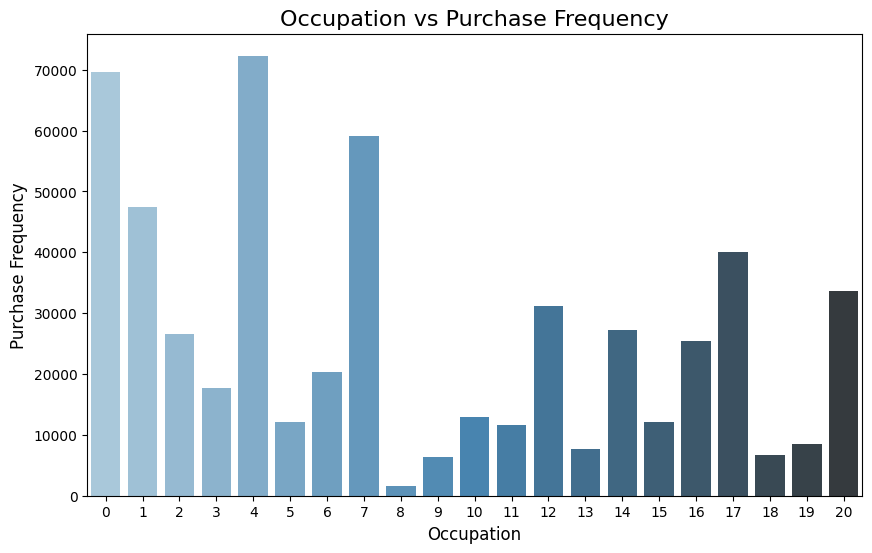

In [ ]:

#Average purchase
avg_pur_by_occ = walmart.groupby('Occupation')['Purchase'].mean().reset_index().sort_values(by='Purchase', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=avg_pur_by_occ['Occupation'], y=avg_pur_by_occ['Purchase'], palette='Blues_d')
plt.title('Occupation vs Average Purchase', fontsize=16)
plt.xlabel('Occupation', fontsize=12)
plt.ylabel('Average Purchase Amount', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

#Purchase distribution
plt.figure(figsize=(10, 6))
sns.boxplot(x=walmart['Occupation'], y=walmart['Purchase'], palette='Blues_d')
plt.title('Occupation vs Purchase Distribution', fontsize=16)
plt.xlabel('Occupation', fontsize=12)
plt.ylabel('Purchase Amount', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

#Purchase frequency
freq_pur_by_occ = walmart['Occupation'].value_counts().reset_index()
freq_pur_by_occ.columns = ['Occupation', 'Frequency']
freq_pur_by_occ = freq_pur_by_occ.sort_values(by='Frequency', ascending=False)

# Set a consistent palette
new_palette = sns.color_palette("Blues_d", len(freq_pur_by_occ))

# Recreate the Occupation vs Purchase Frequency plot
plt.figure(figsize=(10, 6))
sns.barplot(x=freq_pur_by_occ['Occupation'], y=freq_pur_by_occ['Frequency'], palette='Blues_d')
plt.title('Occupation vs Purchase Frequency', fontsize=16)
plt.xlabel('Occupation', fontsize=12)
plt.ylabel('Purchase Frequency', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

# Hypothesis testing

# Two-Sample T-Test (Independent Samples)

Gender

Since Gender has two categories (e.g., 0 and 1), we would like to use a two-sample t-test to test whether the mean purchase amounts differ significantly between genders.

	•	Null Hypothesis (H₀): The mean purchase amounts are the same for both genders.
	•	Alternative Hypothesis (H₁): The mean purchase amount is significantly different between genders.

In [ ]:
from scipy.stats import ttest_ind

# Split the purchase amounts by Gender
group_0 = walmart.loc[walmart['Gender'] == 'M', 'Purchase']
group_1 = walmart.loc[walmart['Gender'] == 'F', 'Purchase']

# Perform a two-sample t-test
t_stat, p_value = ttest_ind(group_0, group_1, equal_var=True)  # Assume equal variances

# Display the results
print(f"T-Statistic: {t_stat}")
print(f"P-Value: {p_value}")

# Interpretation
if p_value <= 0.05:
    print("There is a significant difference in purchase amounts between the two genders.")
else:
    print("There is no significant difference in purchase amounts between the two genders.")

T-Statistic: 44.837957934353966
P-Value: 0.0
There is a significant difference in purchase amounts between the two genders.


Marital_Status

Since Marital_Status has two categories (e.g., 0 and 1), we would like to use a two-sample t-test to test whether the mean purchase amounts differ significantly between married and unmarried customers.

	•	Null Hypothesis (H₀): The mean purchase amounts are the same for both marital status categories.
	•	Alternative Hypothesis (H₁): The mean purchase amount is significantly different between marital status categories.

In [ ]:
from scipy.stats import ttest_ind

# Split the purchase amounts by Gender
group_0 = walmart.loc[walmart['Marital_Status'] == 0, 'Purchase']
group_1 = walmart.loc[walmart['Marital_Status'] == 1, 'Purchase']

# Perform a two-sample t-test
t_stat, p_value = ttest_ind(group_0, group_1, equal_var=True)  # Assume equal variances

# Display the results
print(f"T-Statistic: {t_stat}")
print(f"P-Value: {p_value}")

# Interpretation
if p_value <= 0.05:
    print("There is a significant difference in purchase amounts between the married and not married group.")
else:
    print("There is no significant difference in purchase amounts between the two genders.")

T-Statistic: 0.3436698055440526
P-Value: 0.7310947525758316
There is no significant difference in purchase amounts between the two genders.


# ANOVA

ANOVA aims to examines whether the means of a dependent variable (e.g., Purchase) differ significantly across multiple categorical groups

Age

Since Age has multiple categories (e.g., 0-17, 18-25, 26-35, etc.), we would like to use ANOVA to test whether the mean purchase amounts differ significantly across these categories.

	•	Null Hypothesis (H₀): The means of Purchase are the same across all categories of Age.
	•	Alternative Hypothesis (H₁): At least one Age category has a significantly different mean.

In [ ]:
# prompt: perfom anova to teat variable age and purchase, print out the anova table and analyze the ourput

import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.anova import anova_lm

# Perform ANOVA
model = smf.ols('Purchase ~ C(Age)', data=walmart).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Print the ANOVA table


# Analyze the output
alpha = 0.05  # Significance level

if anova_table['PR(>F)'][0] < alpha:
    print("There is a significant difference in mean purchase amounts across different age groups.")
else:
    print("There is no significant difference in mean purchase amounts across different age groups.")

anova_table

There is a significant difference in mean purchase amounts across different age groups.


<ipython-input-76-bf397e048833>:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if anova_table['PR(>F)'][0] < alpha:


,sum_sq,df,F,PR(>F)
C(Age),6.140003e+09,6.0,40.575799,1.053564e-49
Residual,1.387270e+13,550061.0,NaN,NaN


Occupation

Since Occupation has multiple categories (e.g., 0, 1, 2, …), we would like to use ANOVA to test whether the mean purchase amounts differ significantly across these categories.

	•	Null Hypothesis (H₀): The means of Purchase are the same across all categories of Occupation.
	•	Alternative Hypothesis (H₁): At least one Occupation category has a significantly different mean.

In [ ]:
# prompt: perfom anova to teat variable age and purchase, print out the anova table and analyze the ourput

import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.anova import anova_lm

# Perform ANOVA
model = smf.ols('Purchase ~ C(Occupation)', data=walmart).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Print the ANOVA table


# Analyze the output
alpha = 0.05  # Significance level

if anova_table['PR(>F)'][0] < alpha:
    print("There is a significant difference in mean purchase amounts across different Occupation groups.")
else:
    print("There is no significant difference in mean purchase amounts across different Occupation groups.")

anova_table

There is a significant difference in mean purchase amounts across different Occupation groups.


<ipython-input-77-babe09801891>:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if anova_table['PR(>F)'][0] < alpha:


,sum_sq,df,F,PR(>F)
C(Occupation),4.951671e+10,20.0,98.473775,0.0
Residual,1.382933e+13,550047.0,NaN,NaN


Product_Category

Since Product_Category has multiple categories (e.g., 1, 2, 3, …), we would like to use ANOVA to test whether the mean purchase amounts differ significantly across these categories.

	•	Null Hypothesis (H₀): The means of Purchase are the same across all categories of Product_Category.
	•	Alternative Hypothesis (H₁): At least one Product_Category category has a significantly different mean.

In [ ]:
# prompt: perfom anova to teat variable age and purchase, print out the anova table and analyze the ourput

import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.anova import anova_lm

# Perform ANOVA
model = smf.ols('Purchase ~ C(Product_Category)', data=walmart).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Print the ANOVA table


# Analyze the output
alpha = 0.05  # Significance level

if anova_table['PR(>F)'][0] < alpha:
    print("There is a significant difference in mean purchase amounts across different Product_Category groups.")
else:
    print("There is no significant difference in mean purchase amounts across different Product_Category groups.")

anova_table

There is a significant difference in mean purchase amounts across different Product_Category groups.


<ipython-input-78-6a7fc8ad109b>:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if anova_table['PR(>F)'][0] < alpha:


,sum_sq,df,F,PR(>F)
C(Product_Category),8.834630e+12,19.0,50703.974421,0.0
Residual,5.044212e+12,550048.0,NaN,NaN


Stay_In_Current_City_Years

Since Stay_In_Current_City_Years has multiple categories, we would like to use ANOVA to test whether the mean purchase amounts differ significantly across these categories.

	•	Null Hypothesis (H_0): The means of Purchase are the same across all categories of Stay_In_Current_City_Years.
	•	Alternative Hypothesis (H_1): At least one category has a significantly different mean.

In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.anova import anova_lm

# Fit the ANOVA model
model = smf.ols('Purchase ~ C(Stay_In_Current_City_Years)', data=walmart).fit()

# Perform the ANOVA
anova_table = anova_lm(model, typ=2)

# Display the ANOVA table
anova_table

,sum_sq,df,F,PR(>F)
C(Stay_In_Current_City_Years),9.468844e+08,4.0,9.382655,1.401144e-07
Residual,1.387790e+13,550063.0,NaN,NaN


## Regression

In [ ]:
import pandas as pd

In [ ]:
# divide the data into categorical features & numerical features
# goal is to use categorical features to predict a numerical feature
num_features = ['Purchase']
cat_features = ['Gender',
                'Age',
                'Occupation',
                'City_Category',
                'Stay_In_Current_City_Years',
                'Marital_Status',
                'Product_Category']

In [5]:
X_train = walmart.drop(columns = 'Purchase', axis=1)
y_train = walmart['Purchase']

In [8]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 37.8+ MB


preprocessing

In [15]:
# prompt: change all variables in X_train into category data type

for col in X_train.columns:
  X_train[col] = X_train[col].astype('category')
print(X_train.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   User_ID                     550068 non-null  category
 1   Product_ID                  550068 non-null  category
 2   Gender                      550068 non-null  category
 3   Age                         550068 non-null  category
 4   Occupation                  550068 non-null  category
 5   City_Category               550068 non-null  category
 6   Stay_In_Current_City_Years  550068 non-null  category
 7   Marital_Status              550068 non-null  category
 8   Product_Category            550068 non-null  category
dtypes: category(9)
memory usage: 6.1 MB
None


In [22]:
# prompt: Use X_train, create one_hot_feature to encode non-ordinal variables gender, occupation, city_category, Marital_Status, Product_Category using one hot encoding. create label_feature to encode ordinal variables age, Stay_In_Current_City_Years. create X_feature to merge one hot and label feature.
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Create one_hot_feature for non-ordinal variables
encoder = OneHotEncoder(sparse_output=False, drop='first')
one_hot_features = encoder.fit_transform(X_train[['Gender', 'Occupation', 'City_Category', 'Marital_Status', 'Product_Category']])
encoded_df = pd.DataFrame(one_hot_features, columns=encoder.get_feature_names_out())

# Create label_feature for ordinal variables
label_encoder = LabelEncoder()
X_train['Stay_In_Current_City_Years'] = label_encoder.fit_transform(X_train['Stay_In_Current_City_Years'])
X_train['Age'] = label_encoder.fit_transform(X_train['Age'])
label_features = X_train[['Age', 'Stay_In_Current_City_Years']]

# Merge one-hot and label features
X_feature = pd.concat([encoded_df, label_features], axis=1)


In [24]:
X_feature.head()

,Gender_M,Occupation_1,Occupation_2,Occupation_3,Occupation_4,Occupation_5,Occupation_6,Occupation_7,Occupation_8,Occupation_9,...,Product_Category_13,Product_Category_14,Product_Category_15,Product_Category_16,Product_Category_17,Product_Category_18,Product_Category_19,Product_Category_20,Age,Stay_In_Current_City_Years
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,2
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,2
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,2
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,2
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6,4


In [30]:
# prompt: create linear regression to predict y_train using X_feature_selected and print summary

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_feature, y_train)

# Print the model summary using statsmodels
X2 = sm.add_constant(X_feature)
est = sm.OLS(y_train, X2)
est2 = est.fit()
print(est2.summary())


                            OLS Regression Results                            
Dep. Variable:               Purchase   R-squared:                       0.640
Model:                            OLS   Adj. R-squared:                  0.640
Method:                 Least Squares   F-statistic:                 2.173e+04
Date:                Thu, 06 Feb 2025   Prob (F-statistic):               0.00
Time:                        04:02:09   Log-Likelihood:            -5.1871e+06
No. Observations:              550068   AIC:                         1.037e+07
Df Residuals:                  550022   BIC:                         1.037e+07
Df Model:                          45                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [ ]:
num_features = pd.DataFrame(walmart['Purchase'])
cat_features = pd.DataFrame(walmart[['Gender',
                'Age',
                'Occupation',
                'City_Category',
                'Marital_Status',
                'Stay_In_Current_City_Years',
                'Product_Category']])

In [ ]:
X = cat_features
y = num_features

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 7 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   Gender                      550068 non-null  object
 1   Age                         550068 non-null  object
 2   Occupation                  550068 non-null  int64 
 3   City_Category               550068 non-null  object
 4   Marital_Status              550068 non-null  int64 
 5   Stay_In_Current_City_Years  550068 non-null  object
 6   Product_Category            550068 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 29.4+ MB


In [ ]:
X = X.astype('category')

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 7 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   Gender                      550068 non-null  category
 1   Age                         550068 non-null  category
 2   Occupation                  550068 non-null  category
 3   City_Category               550068 non-null  category
 4   Marital_Status              550068 non-null  category
 5   Stay_In_Current_City_Years  550068 non-null  category
 6   Product_Category            550068 non-null  category
dtypes: category(7)
memory usage: 3.7 MB


In [3]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn import set_config
from copy import deepcopy

In [ ]:
def transform(X):

    # create a dictionary for mapping age ranges
    age_dct = {"0-17": 0, "18-25": 1, "26-35": 2, "36-45": 3, "46-50": 4, "51-55": 5, "55+": 6}
    X = X.copy()  # Avoid SettingWithCopyWarning
    X["Age"] = X["Age"].map(age_dct) # map the age column values to corresponding numeric values

    # dummy encode gender dict
    gender_dct = {"F":0, "M":1}
    X["Gender"] = X["Gender"].map(gender_dct)

    # City_Category One Hot Encoding (turn every category into a column and make it 0 & 1s)
    ohe = OneHotEncoder()
    matrix = ohe.fit_transform(X[["City_Category"]]).toarray()  # conver the result into a numpy array

    column_names = ["City_Cat_A", "City_Cat_B", "City_Cat_C"]

    for i in range(len(matrix.T)):  # Iterates over the one-hot encoded feature columns.
        X[column_names[i]] = matrix.T[i]

    X = X.drop(columns = ["City_Category"], axis=1)

    # Occupation One Hot Encoding
    ohe = OneHotEncoder()
    matrix = ohe.fit_transform(X[["Occupation"]]).toarray()

    column_names = ["Occupation_" + str(i) for i in range(21)]

    for i in range(len(matrix.T)):
        X[column_names[i]] = matrix.T[i]

    X = X.drop(columns = ["Occupation"], axis=1)

    # Product_Category One Hot Encoding
    ohe = OneHotEncoder()
    matrix = ohe.fit_transform(X[["Product_Category"]]).toarray()

    column_names = ["Product_Category_" + str(i) for i in range(20)]

    for i in range(len(matrix.T)):
        X[column_names[i]] = matrix.T[i]

    X = X.drop(columns = ["Product_Category"], axis=1)

    X['Stay_In_Current_City_Years'] = X['Stay_In_Current_City_Years'].replace('4+', 4).astype(int)

    return X

In [ ]:
X = transform(cat_features)
X

,Gender,Age,Marital_Status,Stay_In_Current_City_Years,City_Cat_A,City_Cat_B,City_Cat_C,Occupation_0,Occupation_1,Occupation_2,...,Product_Category_10,Product_Category_11,Product_Category_12,Product_Category_13,Product_Category_14,Product_Category_15,Product_Category_16,Product_Category_17,Product_Category_18,Product_Category_19
0,0,0,0,2,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0,0,2,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0,0,2,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0,0,2,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,6,0,4,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1,5,1,1,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
550064,0,2,0,3,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
550065,0,2,1,4,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
550066,0,6,0,2,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 48 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Gender                      550068 non-null  int64  
 1   Age                         550068 non-null  int64  
 2   Marital_Status              550068 non-null  int64  
 3   Stay_In_Current_City_Years  550068 non-null  int64  
 4   City_Cat_A                  550068 non-null  float64
 5   City_Cat_B                  550068 non-null  float64
 6   City_Cat_C                  550068 non-null  float64
 7   Occupation_0                550068 non-null  float64
 8   Occupation_1                550068 non-null  float64
 9   Occupation_2                550068 non-null  float64
 10  Occupation_3                550068 non-null  float64
 11  Occupation_4                550068 non-null  float64
 12  Occupation_5                550068 non-null  float64
 13  Occupation_6  

In [ ]:
from sklearn.preprocessing import StandardScaler, RobustScaler
scaler = RobustScaler()

y = scaler.fit_transform(y)
y = pd.DataFrame(y)
y

,0
0,0.051838
1,1.147970
2,-1.063232
3,-1.121810
4,-0.012518
...,...
550063,-1.232386
550064,-1.231905
550065,-1.269459
550066,-1.232868


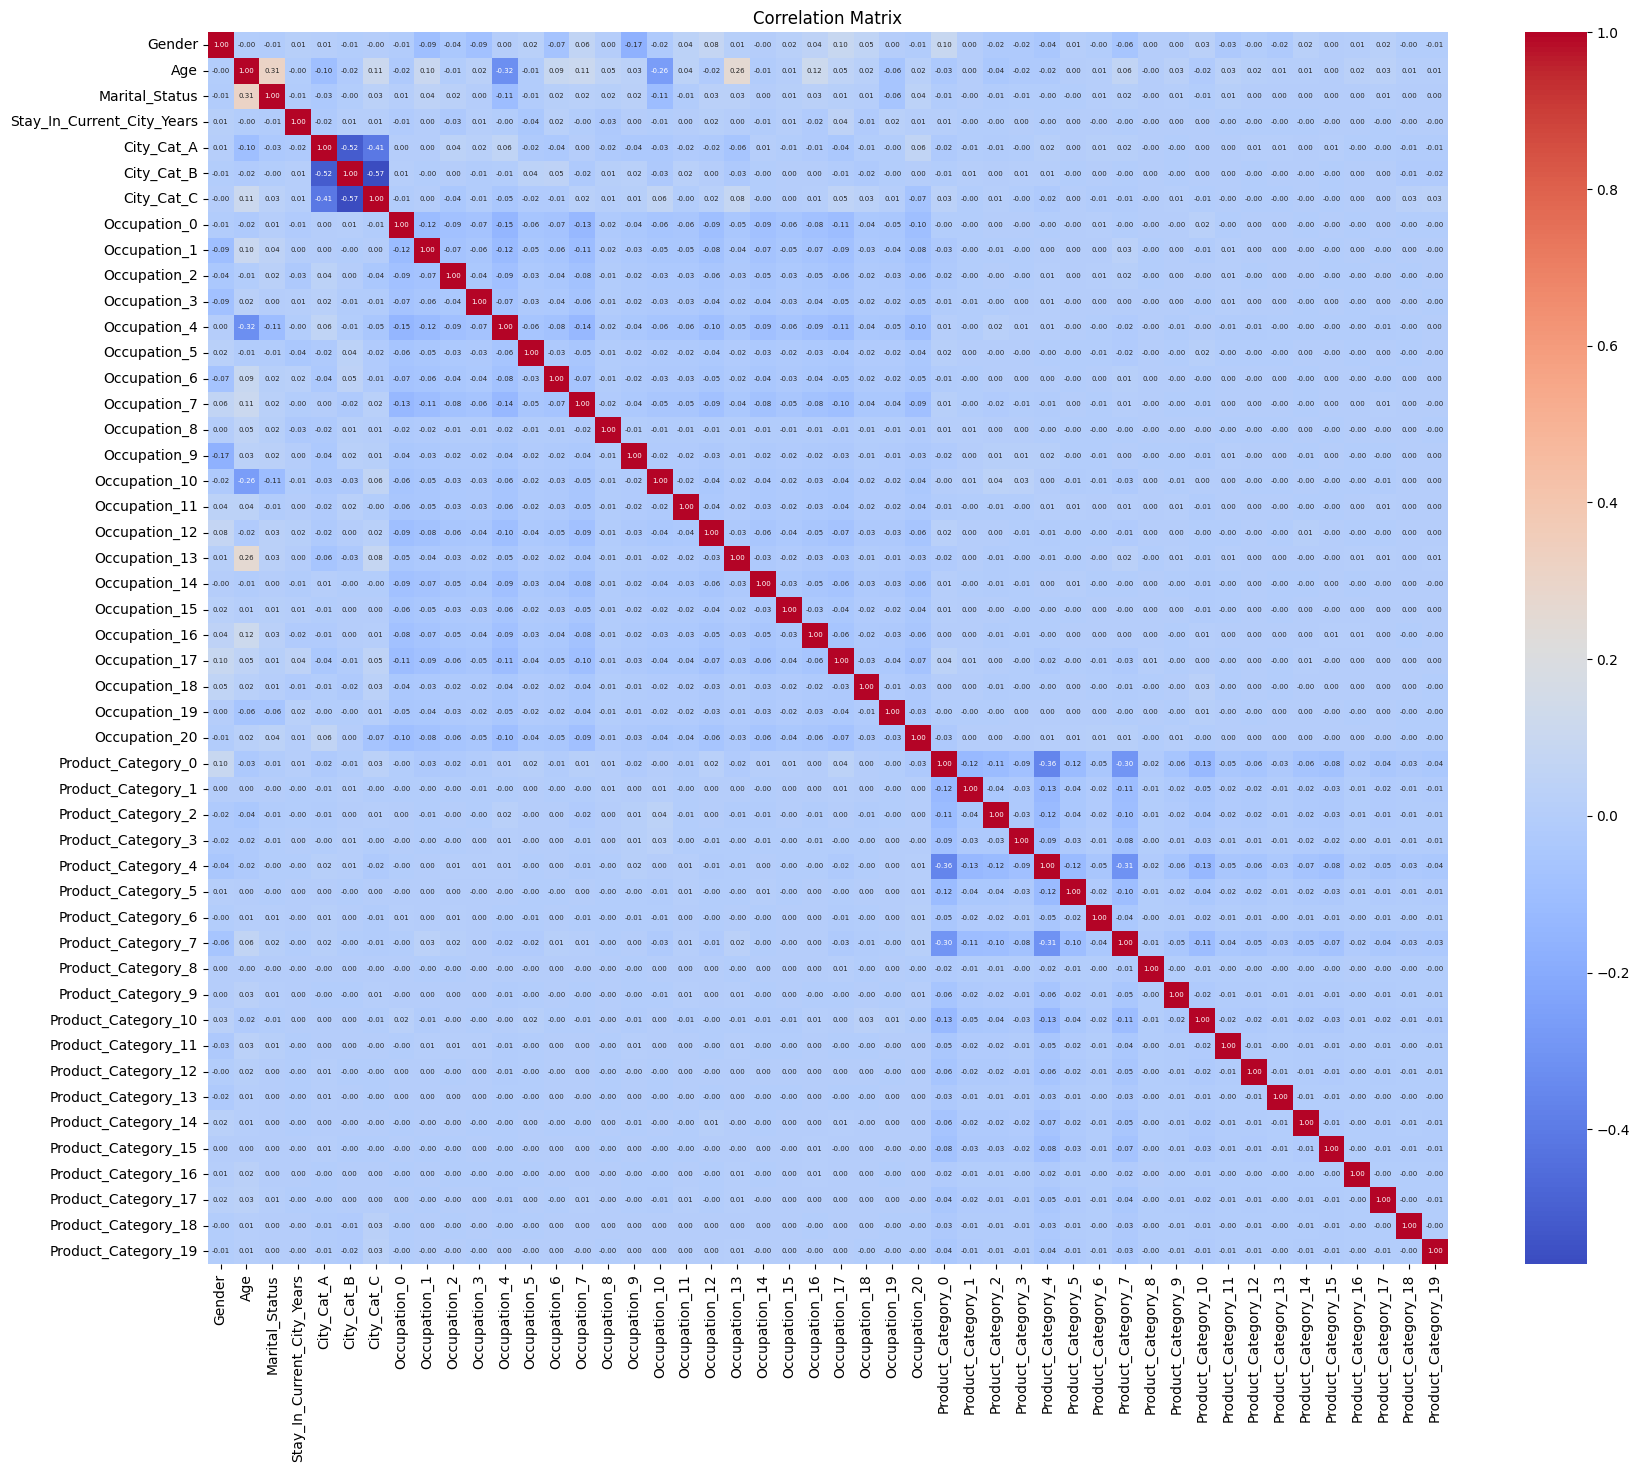

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

correlation_matrix = X.corr()

# Optional: Visualize the correlation matrix as a heatmap
plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, annot_kws={"size": 5})
plt.title("Correlation Matrix")
plt.show()

In [ ]:
X.drop(columns=['City_Cat_A', 'City_Cat_B', 'City_Cat_C'], inplace=True)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11122)

In [ ]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression()

In [ ]:
train = linreg.score(X_train, y_train)
print('Linear Regression on trained data: ', train)

Linear Regression on trained data:  0.6386122637481636


In [ ]:
test = linreg.score(X_test, y_test)
print('Linear Regression on test data: ', test)

Linear Regression on test data:  0.6359280215624099


In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
y_pred = linreg.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 0.23678552421209342
R-squared: 0.6359280215624099


In [ ]:
import statsmodels.api as sm
# Add a constant to the independent variables
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Print the regression summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      0   R-squared:                       0.638
Model:                            OLS   Adj. R-squared:                  0.638
Method:                 Least Squares   F-statistic:                 2.255e+04
Date:                Mon, 09 Dec 2024   Prob (F-statistic):               0.00
Time:                        04:13:48   Log-Likelihood:            -3.8245e+05
No. Observations:              550068   AIC:                         7.650e+05
Df Residuals:                  550024   BIC:                         7.655e+05
Df Model:                          43                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [ ]:
# prompt: use VIF to test multicollinearity

# Calculate VIF for each feature
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["feature"] = X_train.columns
vif_data["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(len(X_train.columns))]

vif_data

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,feature,VIF
0,Gender,1.094730
1,Age,1.507486
2,Marital_Status,1.119810
3,Stay_In_Current_City_Years,1.007203
4,Occupation_0,inf
5,Occupation_1,inf
6,Occupation_2,inf
7,Occupation_3,inf
8,Occupation_4,inf
9,Occupation_5,inf


Reduces the impact of multicollinearity by shrinking correlated variables.

There is no significant difference in accuracy score after implementing the ridge regression with the best alpha(?)